<a href="https://colab.research.google.com/github/msc23/DataVisualization/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

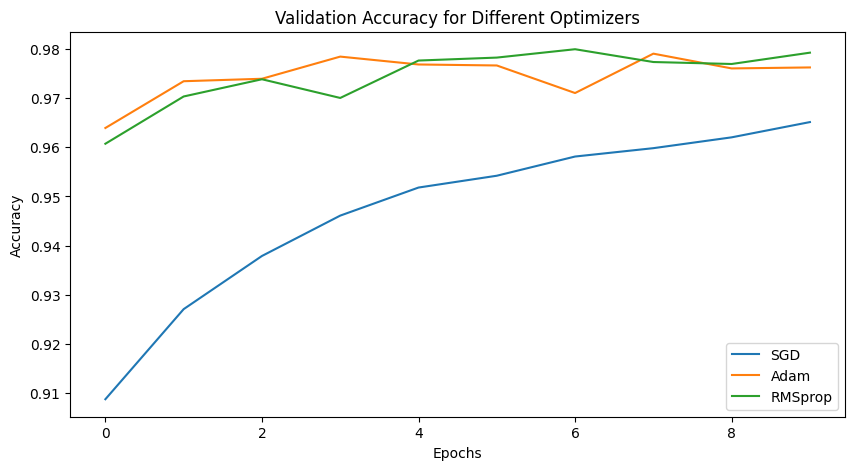

In [16]:
# Practical 1
# Aim: Implement Feed-forward Neural Network and train the network with different optimizers and compare the results

# Install required packages
# !pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

# Define a function to build the model
def build_model():
    return Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

# Optimizers to test
optimizers = {'SGD': SGD(), 'Adam': Adam(), 'RMSprop': RMSprop()}
results = {}

# Train and evaluate model for each optimizer
for name, optimizer in optimizers.items():
    model = build_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    results[name] = history.history['val_accuracy']

# Plot validation accuracy
plt.figure(figsize=(10, 5))
for name, val_acc in results.items():
    plt.plot(val_acc, label=name)
plt.title('Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
1875/1875 - 9s - loss: 0.7707 - accuracy: 0.8234 - val_loss: 0.3927 - val_accuracy: 0.9323 - 9s/epoch - 5ms/step
Epoch 2/20
1875/1875 - 6s - loss: 0.5088 - accuracy: 0.9026 - val_loss: 0.3177 - val_accuracy: 0.9544 - 6s/epoch - 3ms/step
Epoch 3/20
1875/1875 - 8s - loss: 0.4586 - accuracy: 0.9131 - val_loss: 0.3112 - val_accuracy: 0.9515 - 8s/epoch - 4ms/step
Epoch 4/20
1875/1875 - 7s - loss: 0.4367 - accuracy: 0.9177 - val_loss: 0.2906 - val_accuracy: 0.9561 - 7s/epoch - 4ms/step
Epoch 5/20
1875/1875 - 7s - loss: 0.4247 - accuracy: 0.9193 - val_loss: 0.2772 - val_accuracy: 0.9603 - 7s/epoch - 4ms/step
Epoch 6/20
1875/1875 - 8s - loss: 0.4143 - accuracy: 0.9229 - val_loss: 0.2774 - val_accuracy: 0.9609 - 8s/epoch - 4ms/step
Epoch 7/20
1875/1875 - 6s - loss: 0.4098 - accuracy: 0.9242 - val_loss: 0.2687 - val_accuracy: 0.9596 - 6s/epoch - 3ms/step
Epoch 8/20
1875/1875 - 8s - loss: 0.4129 - accuracy: 0.9228 - val_loss: 0.2688 - val_accuracy: 0.9614 - 8s/epoch - 4ms/step
Epoch 9/

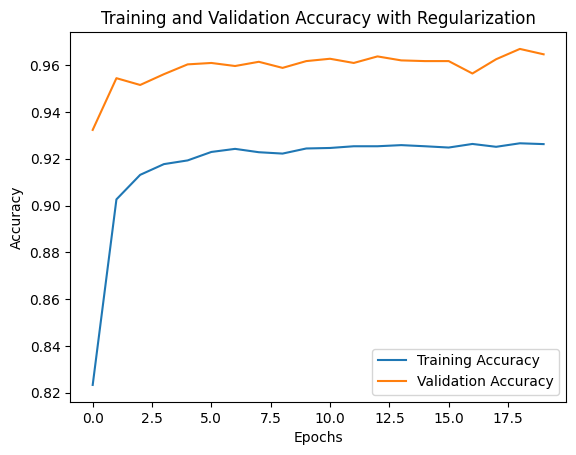

In [5]:
# Practical 2
# Aim : Write a program to implement regularization to prevent the model from overfitting
# !pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)
 # Build the model with regularization and dropout
model = Sequential([
Dense(128, activation='relu', input_shape=(784,),
kernel_regularizer=tf.keras.regularizers.l2(0.001)),
Dropout(0.5),
Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
Dropout(0.5),
Dense(10, activation='softmax')
])
 # Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=2)
 # Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/10
1563/1563 - 48s - loss: 1.5576 - accuracy: 0.4424 - val_loss: 1.3505 - val_accuracy: 0.5284 - 48s/epoch - 31ms/step
Epoch 2/10
1563/1563 - 50s - loss: 1.2682 - accuracy: 0.5531 - val_loss: 1.1877 - val_accuracy: 0.5856 - 50s/epoch - 32ms/step
Epoch 3/10
1563/1563 - 47s - loss: 1.1584 - accuracy: 0.5953 - val_loss: 1.1473 - val_accuracy: 0.6008 - 47s/epoch - 30ms/step
Epoch 4/10
1563/1563 - 49s - loss: 1.0909 - accuracy: 0.6207 - val_loss: 1.0735 - val_accuracy: 0.6294 - 49s/epoch - 32ms/step
Epoch 5/10
1563/1563 - 47s - loss: 1.0364 - accuracy: 0.6414 - val_loss: 1.0479 - val_accuracy: 0.6352 - 47s/epoch - 30ms/step
Epoch 6/10
1563/1563 - 49s - loss: 1.0016 - accuracy: 0.6544 - val_loss: 1.0236 - val_accuracy: 0.6444 - 49s/epoch - 32ms/step
Epoch 7/10
1563/1563 - 49s - loss: 0.9714 - accuracy: 0.6655 - val_loss: 1.0204 - val_accuracy: 0.6447 - 49s/epoch - 32ms/step
Epoch 8/10
1563/1563 - 52s - loss: 0.9514 - accuracy: 0.6712 - val_loss: 0.9997 - val_accuracy: 0.6557 - 52s/ep

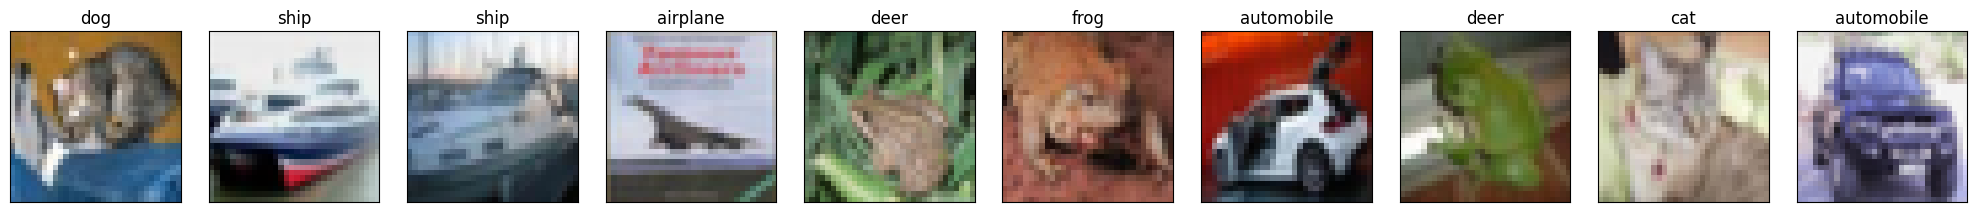

In [20]:
# Practical 3
# Aim: Implement deep learning for recognizing classes for datasets like CIFAR-10 images for previously unseen images and assign them to one of the 10 classes

# Install required packages
# !pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

# Predict and visualize the first 10 test images
predictions = model.predict(X_test[:10])

# Plot the first 10 test images with their predicted classes
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[np.argmax(predictions[i])])
plt.tight_layout()
plt.show()



Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.2543 - val_loss: 0.1717
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1553 - val_loss: 0.1416
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1349 - val_loss: 0.1258
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1226 - val_loss: 0.1169
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1158 - val_loss: 0.1118
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1117 - val_loss: 0.1086
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1089 - val_loss: 0.1061
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1065 - val_loss: 0.1041
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1045 - val_loss: 0.1024
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


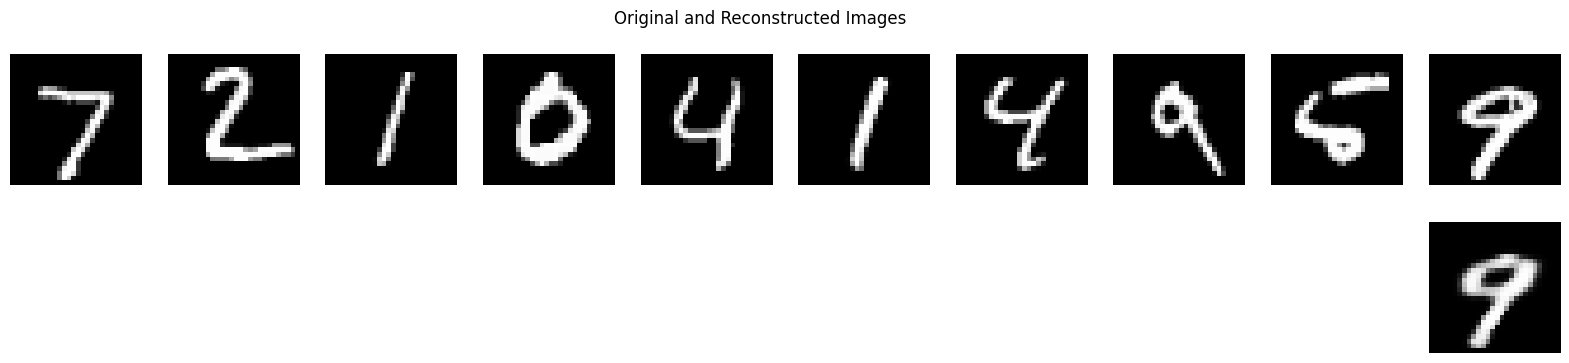

In [7]:
# Practical 4
# Aim : Implement deep learning for the prediction of the autoencoder from thetestdata(e.g. MNIST data set)
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# Load and Prepare Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0
# Define theAutoencoder Model
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)
# Compile and Train theAutoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))
# Predict and Display Results
decoded_imgs = autoencoder.predict(x_test)
# Plotting original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(10):
  # Original images
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  ax.axis('off')
 # Reconstructed images
ax = plt.subplot(2, 10, i + 11)
plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
ax.axis('off')
plt.suptitle('Original and Reconstructed Images')
plt.show()

Epoch 1/5
938/938 [==============================] - 49s 51ms/step - loss: 0.1781 - accuracy: 0.9458 - val_loss: 0.0577 - val_accuracy: 0.9823
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.0414 - val_accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0367 - val_accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0342 - val_accuracy: 0.9871
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0484 - accuracy: 0.9852
Test accuracy: 0.9852
313/313 [==============================] - 3s 10ms/step


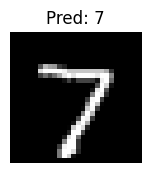

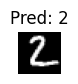

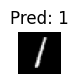

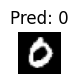

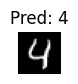

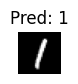

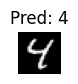

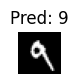

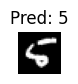

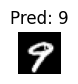

In [8]:
# Practical 5
# Aim : Implement Convolutional Neural Network for Digit recognition on the MNISTdataset
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# Load and Prepare Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# Build the CNN Model
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Flatten(),
Dense(64, activation='relu'),
Dense(10, activation='softmax')
])
# Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, batch_size=64,
validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f'Test accuracy: {test_acc:.4f}')
# Predictions and Visualization
predictions = model.predict(x_test.reshape(-1, 28, 28, 1))
plt.figure(figsize=(20, 4))
for i in range(10):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(x_test[i], cmap='gray')
  ax.axis('off')
  ax.set_title(f'Pred: {predictions[i].argmax()}')
  plt.show()

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
1563/1563 [==============================] - 64s 39ms/step - loss: 2.0511 - accuracy: 0.2789 - val_loss: 1.9610 - val_accuracy: 0.3017
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9302 - accuracy: 0.3094 - val_loss: 1.9215 - val_accuracy: 0.3080
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9031 - accuracy: 0.3168 - val_loss: 1.9082 - val_accuracy: 0.3107
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.8905 - accuracy: 0.3181 - val_loss: 1.9016 - val_accuracy: 0.3137
Epoch 5/5
1/1 [==============================] - 1s 861ms/step


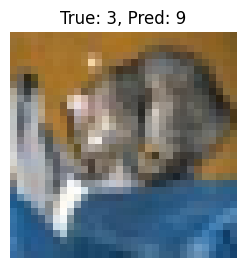

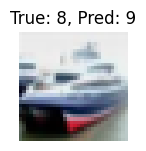

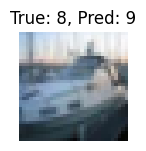

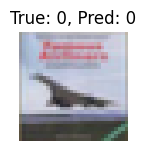

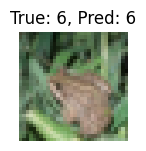

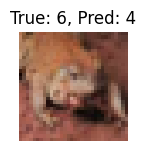

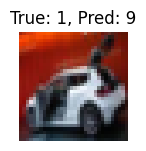

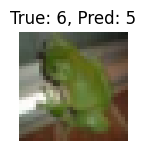

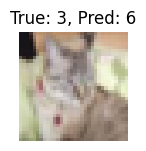

In [22]:
# Practical 6
#  Aim :Write aprogram to implementTransfer Learning on the suitable dataset
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x =GlobalAveragePooling2D()(base_model.output)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Freeze base model layers
base_model.trainable = False
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
# Predict and visualize some test images
predictions = model.predict(x_test[:9])
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[i])
  plt.title(f"True: {y_test[i][0]}, Pred: {predictions[i].argmax()}")
  plt.axis('off')
  plt.show()

In [13]:
# Practical 7
# Aim: Write a program to implement a simple form of a recurrent neural network.
#  a. E.g. (4-to-1 RNN) to show that the quantity of rain on a certain day also depends on the values of the previous day
import numpy as np
import tensorflow as tf

# Generate synthetic data
data = np.random.rand(100, 1)  # Generate 100 random data points representing rainfall

# Prepare the dataset
X, y = [], []
for i in range(len(data) - 4):
    X.append(data[i:i+4])  # Take sequences of 4 days
    y.append(data[i+4])    # The target is the value of the 5th day
X, y = np.array(X), np.array(y)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, input_shape=(4, 1)),  # RNN layer with 50 units
    tf.keras.layers.Dense(1)                            # Dense layer with 1 unit for the output
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss

# Train the model
model.fit(X, y, epochs=200, verbose=0)  # Train for 200 epochs

# Predict the next value
predicted_rainfall = model.predict(data[-4:].reshape(1, 4, 1))  # Predict the next day rainfall based on the last 4 days
print('Predicted Rainfall for the next day: ', predicted_rainfall)


1/1 [==============================] - 0s 148ms/step
Predicted Rainfall for the next day:  [[0.55816036]]


In [14]:
# b. LSTMforsentiment analysis on datasets like UMICH SI650 for similar.

import tensorflow as tf
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
# Load and preprocess data
sentences = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [1 if fileid.startswith('pos') else 0 for fileid in movie_reviews.fileids()]
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
X=tokenizer.texts_to_sequences(sentences)
X=tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=100)
y =np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build and train the LSTM model
model = tf.keras.Sequential([
tf.keras.layers.Embedding(5000, 128, input_length=100),
tf.keras.layers.LSTM(128),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
# Evaluate the model
print('Test Accuracy: ',model.evaluate(X_test, y_test)[1])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Epoch 1/5
25/25 [==============================] - 10s 323ms/step - loss: 0.6953 - accuracy: 0.5194 - val_loss: 0.6941 - val_accuracy: 0.5025
Epoch 2/5
25/25 [==============================] - 5s 218ms/step - loss: 0.6939 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 3/5
25/25 [==============================] - 7s 300ms/step - loss: 0.6932 - accuracy: 0.4894 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 4/5
25/25 [==============================] - 5s 216ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 5/5
13/13 [==============================] - 1s 50ms/step - loss: 0.6932 - accuracy: 0.5025
Test Accuracy:  0.5024999976158142


In [15]:
# Practical 8
# Aim :Write a program forobject detection using pre-trained models to use objectDetection
#importing libraries
import cv2
import matplotlib.pyplot as plt
from matplotlib import ft2font
#importing and using necessary files
config_file=r'C:\Users\HARDIK PATIL\ssd_mobilenet_v3_large_coco_2020_01_14(1).pbtxt'
frozen_model=r'C:\Users\HARDIK PATIL\frozen_inference_graph.pb'
#Tenserflow object detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)
#Reading Coco dataset
classLabels=[]
filename=r'C:\Users\HARDIK PATIL\coco.names'
with open(filename,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')
print("Number of Classes")
print(len(classLabels))
print("Class labels")
print(classLabels)
 #Model training
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
#reading image
img=cv2.imread(r'C:\Users\HARDIK PATIL\test.jpg')
plt.imshow(img)
  #objectdetection
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
forclass_id,conf,boxinzip(ClassIndex.flatten(),confidence.flatten(),bbox):
if class_idindesired_classes:
  class_counts[class_id]+=1#Incrementcounterforthedetectedclass
label=f'{classLabels[class_id-1]}:{conf:.2f}'
cv2.rectangle(img,box,color=(0,255,0),thickness=2)
cv2.putText(img, label, (box[0], box[1]- 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0),2)
#Displaytheimagewithdetectedobjects
print(class_counts)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

IndentationError: expected an indented block after 'with' statement on line 15 (<ipython-input-15-cca5ce5f884b>, line 16)